In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Preparing Training Data

In [3]:
df = pd.read_csv('fraudTrain.csv')

In [13]:
pd.set_option('display.max_columns', None)

In [15]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [17]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [19]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [49]:
df1 = df.drop(['Unnamed: 0','trans_num','unix_time','first','last','street','city','state','zip','job'], axis = 1)

<Axes: xlabel='is_fraud', ylabel='count'>

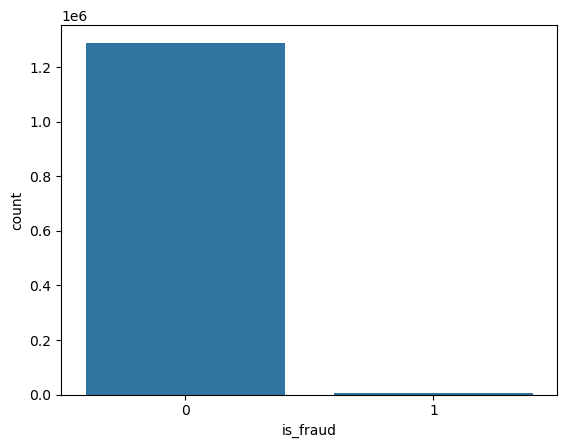

In [55]:
sns.countplot(data = df1, x = 'is_fraud')

In [57]:
df1['is_fraud'].sum()

7506

In [59]:
7506/1296675

0.005788651743883394

In [63]:
df1['trans_year'] = df1['trans_date_trans_time'].apply(lambda x: x.split()[0].split('-')[0])

In [67]:
df1['trans_year'] = df1['trans_year'].apply(lambda x: int(x))

In [71]:
df1['trans_month'] = df1['trans_date_trans_time'].apply(lambda x: int(x.split()[0].split('-')[1]))

In [73]:
df1['trans_date'] = df1['trans_date_trans_time'].apply(lambda x: int(x.split()[0].split('-')[2]))

In [75]:
df1['trans_hour'] = df1['trans_date_trans_time'].apply(lambda x: int(x.split()[1].split(':')[0]))

In [77]:
df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0,2020,6,21,12
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0,2020,6,21,12
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0,2020,6,21,12
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0,2020,6,21,12


In [81]:
df1 = df1.drop('trans_date_trans_time', axis  =1)

In [85]:
df1['dob_year'] = df1['dob'].apply(lambda x: int(x.split('-')[0]))

In [125]:
df1.drop('dob', axis  =1, inplace = True)

In [91]:
df1['gender'] = df1['gender'].map({'F':0, 'M':1})

In [93]:
df1

,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour,dob_year
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019,1,1,0,1988
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,1978
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,1,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,1962
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1967
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,1,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,1,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,1961
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,1,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0,2020,6,21,12,1979
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,1,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,1967
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,1,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,1980


In [99]:
category = pd.get_dummies(df1['category'])

In [105]:
category

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1296671,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1296672,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1296673,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
category.replace({False: 0, True: 1}, inplace=True)

/var/folders/7t/cv31kdkd7zg5scdfkr8cghqh0000gn/T/ipykernel_6958/3425899791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  category.replace({False: 0, True: 1}, inplace=True)


In [119]:
df1 = pd.concat([df1, category], axis = 1)

In [121]:
df1 = df1.drop('category', axis = 1)

In [127]:
df1

,cc_num,merchant,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour,dob_year,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,1988,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,1978,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,1962,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1967,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,375534208663984,fraud_Keeling-Crist,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,1986,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,0,2020,6,21,12,1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,6011149206456997,fraud_Abernathy and Sons,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,0,2020,6,21,12,1979,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,3514865930894695,fraud_Stiedemann Ltd,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,0,2020,6,21,12,1967,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,0,2020,6,21,12,1980,0,1,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='lat', ylabel='long'>

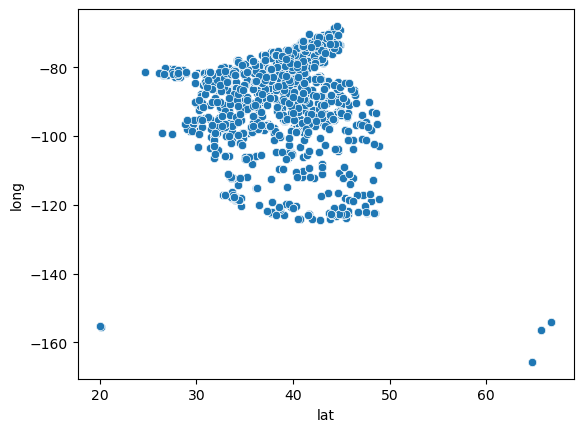

In [368]:
sns.scatterplot(data = df1, x = 'lat', y = 'long')


<Axes: xlabel='merch_lat', ylabel='merch_long'>

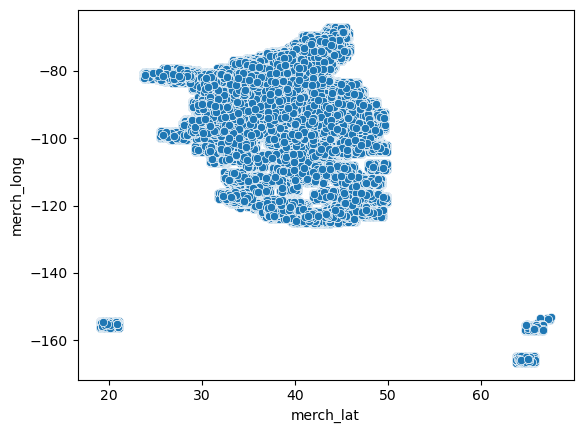

In [370]:
sns.scatterplot(data = df1, x = 'merch_lat', y = 'merch_long')

In [137]:
df1 = df1.drop('merchant', axis  = 1)

In [364]:
df1

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour,dob_year,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,1988,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,1978,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,1962,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1967,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,1986,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,0,2020,6,21,12,1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,0,2020,6,21,12,1979,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,0,2020,6,21,12,1967,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,0,2020,6,21,12,1980,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
df1.corr()['is_fraud']

cc_num           -0.000981
amt               0.219404
gender            0.007642
lat               0.001894
long              0.001721
city_pop          0.002136
merch_lat         0.001741
merch_long        0.001721
is_fraud          1.000000
trans_year        0.003004
trans_month      -0.012409
trans_date        0.003848
trans_hour        0.013799
dob_year         -0.012378
entertainment    -0.012200
food_dining      -0.015025
gas_transport    -0.004851
grocery_net      -0.007136
grocery_pos       0.035558
health_fitness   -0.014885
home             -0.017848
kids_pets        -0.014967
misc_net          0.025886
misc_pos         -0.008937
personal_care    -0.012167
shopping_net      0.044261
shopping_pos      0.005955
travel           -0.006924
Name: is_fraud, dtype: float64

<Axes: >

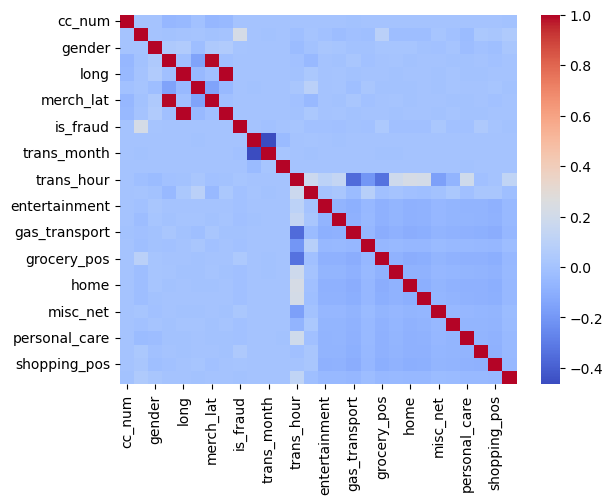

In [143]:
sns.heatmap(df1.corr(), cmap = 'coolwarm')

In [147]:
df1 = df1.drop('cc_num', axis = 1)

In [149]:
df1

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour,dob_year,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,1988,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,1978,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,1962,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1967,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,1986,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,0,2020,6,21,12,1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,0,2020,6,21,12,1979,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,0,2020,6,21,12,1967,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,0,2020,6,21,12,1980,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
y_train = df1['is_fraud']

In [159]:
X_train = df1.drop('is_fraud', axis = 1)

# Preparing Test Data

In [197]:
test = pd.read_csv('fraudTest.csv')

In [198]:
test.drop(['Unnamed: 0','cc_num','merchant','first','last','street','city','zip','job','trans_num','unix_time'], inplace = True, axis = 1)

In [199]:
test

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0


In [203]:
test['trans_date'] = test['trans_date_trans_time'].apply(lambda x: int(x.split()[0].split('-')[2]))

In [205]:
test['trans_year'] = test['trans_date_trans_time'].apply(lambda x: int(x.split()[0].split('-')[0]))

In [207]:
test['trans_month'] = test['trans_date_trans_time'].apply(lambda x: int(x.split()[0].split('-')[1]))

In [209]:
test['trans_hour'] = test['trans_date_trans_time'].apply(lambda x: int(x.split()[1].split(':')[0]))

In [211]:
test.drop('trans_date_trans_time', inplace = True, axis = 1)

In [213]:
test

,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_hour
0,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,21,2020,6,12
1,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,21,2020,6,12
2,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,21,2020,6,12
3,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,21,2020,6,12
4,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,21,2020,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,31,2020,12,23
555715,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,31,2020,12,23
555716,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,31,2020,12,23
555717,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,31,2020,12,23


In [215]:
cat = pd.get_dummies(test['category'])

In [217]:
cat.replace({False: 0, True:1}, inplace = True)

/var/folders/7t/cv31kdkd7zg5scdfkr8cghqh0000gn/T/ipykernel_6958/3376397815.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat.replace({False: 0, True:1}, inplace = True)


In [219]:
cat

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [221]:
test = pd.concat([test, cat], axis = 1)

In [223]:
test.drop('category', inplace = True, axis = 1)

In [225]:
test

,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_hour,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,21,2020,6,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,31,2020,12,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,31,2020,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,31,2020,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,31,2020,12,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [227]:
test['dob_year'] = test['dob'].apply(lambda x: int(x.split('-')[0]))

In [229]:
test.drop('dob', inplace = True, axis = 1)

In [233]:
test['gender'] = test['gender'].map({'F':0, 'M':1})

In [237]:
test.drop('state', inplace = True, axis = 1)

In [239]:
test

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_hour,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,dob_year
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1968
1,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1990
2,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,0,21,2020,6,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1970
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1987
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,0,21,2020,6,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,0,31,2020,12,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1966
555715,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,0,31,2020,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1999
555716,86.88,0,46.1966,-118.9017,3684,46.658340,-119.715054,0,31,2020,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1981
555717,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,0,31,2020,12,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1965


In [241]:
test.corr()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_hour,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,dob_year
amt,1.000000,0.000027,0.002339,-0.002046,0.002760,0.002404,-0.002053,0.182267,-0.000829,NaN,-0.000717,-0.029860,-0.009622,-0.032747,-0.012466,-0.019016,0.095858,-0.026328,-0.023448,-0.023499,0.013369,-0.011849,-0.037254,0.025627,0.014950,0.049389,0.012865
gender,0.000027,1.000000,0.042692,0.051235,-0.029367,0.042569,0.051203,0.000748,0.000382,NaN,-0.000445,-0.038515,0.020059,0.009846,-0.004390,-0.005399,0.012424,0.010087,0.013893,-0.004719,-0.006995,0.009034,-0.035308,-0.011912,-0.020321,0.017606,-0.004505
lat,0.002339,0.042692,1.000000,-0.012892,-0.152666,0.993557,-0.012831,0.005863,-0.002297,NaN,0.000686,-0.010676,0.004097,-0.003642,0.014250,-0.014888,0.002071,0.005743,-0.001504,-0.002322,0.006217,-0.002898,-0.001887,0.001009,-0.011444,0.001209,-0.045446
long,-0.002046,0.051235,-0.012892,1.000000,-0.051524,-0.012551,0.999115,-0.000972,0.000334,NaN,-0.001510,-0.001595,0.000976,0.003187,-0.001583,0.005164,-0.000681,-0.001177,0.000901,-0.000422,-0.003162,0.004835,-0.001873,-0.006222,0.001832,-0.000448,0.027613
city_pop,0.002760,-0.029367,-0.152666,-0.051524,1.000000,-0.151703,-0.051489,-0.004910,0.001938,NaN,-0.001117,0.018937,-0.000874,0.003584,-0.020576,0.021078,-0.003473,-0.002742,-0.003174,0.001100,-0.003436,0.005423,-0.001508,0.002411,0.011438,-0.000691,0.089932
merch_lat,0.002404,0.042569,0.993557,-0.012551,-0.151703,1.000000,-0.012496,0.005812,-0.002302,NaN,0.000750,-0.010512,0.004088,-0.003589,0.013990,-0.014841,0.002343,0.005610,-0.001642,-0.002124,0.006116,-0.002736,-0.001925,0.000956,-0.011403,0.001157,-0.045100
merch_long,-0.002053,0.051203,-0.012831,0.999115,-0.051489,-0.012496,1.000000,-0.001060,0.000277,NaN,-0.001526,-0.001639,0.001029,0.003213,-0.001584,0.005099,-0.000592,-0.001258,0.000934,-0.000500,-0.003160,0.004944,-0.001862,-0.006153,0.001679,-0.000481,0.027645
is_fraud,0.182267,0.000748,0.005863,-0.000972,-0.004910,0.005812,-0.001060,1.000000,-0.009203,NaN,-0.011748,0.011686,-0.010743,-0.011049,-0.006112,-0.005369,0.027982,-0.010468,-0.013417,-0.012619,0.021642,-0.007383,-0.009257,0.037941,0.002115,-0.004551,-0.007513
trans_date,-0.000829,0.000382,-0.002297,0.000334,0.001938,-0.002302,0.000277,-0.009203,1.000000,NaN,-0.104058,-0.000161,-0.001995,0.000802,-0.000867,0.002917,0.000470,-0.000597,-0.001337,0.001367,-0.001255,0.000801,0.000943,-0.000047,-0.000596,0.000404,0.002725
trans_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

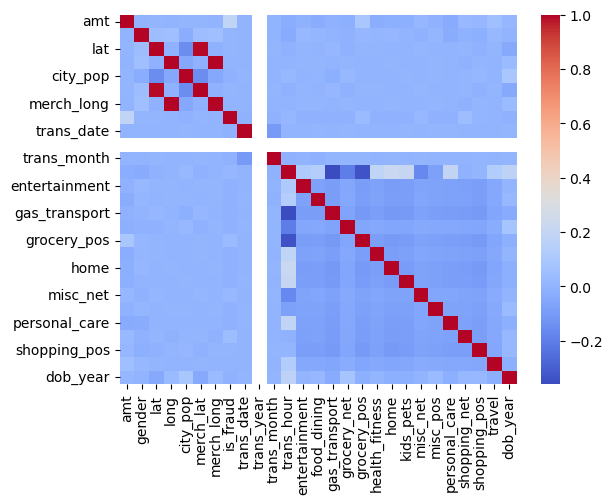

In [243]:
sns.heatmap(test.corr(), cmap = 'coolwarm')

In [247]:
test['trans_year'].nunique()

1

In [249]:
test.drop('trans_year', inplace = True, axis = 1)

In [251]:
test.nunique()

amt                37256
gender                 2
lat                  910
long                 910
city_pop             835
merch_lat         546490
merch_long        551770
is_fraud               2
trans_date            31
trans_month            7
trans_hour            24
entertainment          2
food_dining            2
gas_transport          2
grocery_net            2
grocery_pos            2
health_fitness         2
home                   2
kids_pets              2
misc_net               2
misc_pos               2
personal_care          2
shopping_net           2
shopping_pos           2
travel                 2
dob_year              81
dtype: int64

In [257]:
df1.columns

Index(['amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_year', 'trans_month', 'trans_date', 'trans_hour',
       'dob_year', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'],
      dtype='object')

In [261]:
test['trans_year'] = 2020

In [263]:
test

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_date,trans_month,trans_hour,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,dob_year,trans_year
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,0,21,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1968,2020
1,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,0,21,6,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1990,2020
2,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,0,21,6,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1970,2020
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,0,21,6,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1987,2020
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,0,21,6,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1955,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,0,31,12,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1966,2020
555715,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,0,31,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1999,2020
555716,86.88,0,46.1966,-118.9017,3684,46.658340,-119.715054,0,31,12,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1981,2020
555717,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,0,31,12,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1965,2020


In [265]:
test = test[['amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_year', 'trans_month', 'trans_date', 'trans_hour',
       'dob_year', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel']]

In [267]:
test

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_date,trans_hour,dob_year,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,0,2020,6,21,12,1968,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,0,2020,6,21,12,1990,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,0,2020,6,21,12,1970,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,0,2020,6,21,12,1987,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,0,2020,6,21,12,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,0,2020,12,31,23,1966,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,0,2020,12,31,23,1999,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,0,46.1966,-118.9017,3684,46.658340,-119.715054,0,2020,12,31,23,1981,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,0,2020,12,31,23,1965,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [269]:
y_test = test['is_fraud']

In [271]:
X_test = test.drop('is_fraud', axis = 1)

<Axes: xlabel='is_fraud', ylabel='count'>

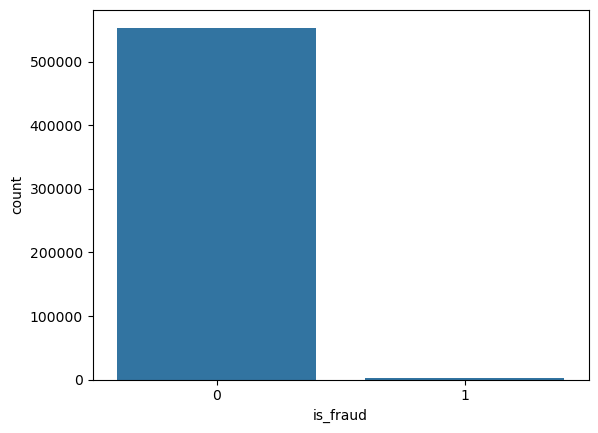

In [281]:
sns.countplot(data = test, x = 'is_fraud')

In [351]:
training_data = X_train
training_data['output'] = y_train

In [355]:
training_data.to_csv('training_data', index = False)

In [357]:
testing_data = X_test
testing_data['output'] = y_test

In [359]:
testing_data

,amt,gender,lat,long,city_pop,merch_lat,merch_long,trans_year,trans_month,trans_date,trans_hour,dob_year,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,output
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,2020,6,21,12,1968,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,2020,6,21,12,1990,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,2020,6,21,12,1970,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,2020,6,21,12,1987,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,2020,6,21,12,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,2020,12,31,23,1966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
555715,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,2020,12,31,23,1999,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
555716,86.88,0,46.1966,-118.9017,3684,46.658340,-119.715054,2020,12,31,23,1981,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
555717,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,2020,12,31,23,1965,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [361]:
testing_data.to_csv('testing_data', index = False)